### Data Description

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Data Attributes

1.) Patient's Age - Numerical <br>
2.) Year of operation of the Patient - Numerical (Year is 1900) <br>
3.) Axillary nodes - Numerical <br>
4.) Survival Status - <br>
        &emsp; 1 = Survival of the Patient is more than 5 years <br> 
        &emsp; 2 = Patient died within 5 years from the operation <br>

Source: Kaggle

In [1]:
# Importing the necessary libraries for data science
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Download Haberman Cancer Survival dataset from Kaggle. 
# (https://www.kaggle.com/gilsousa/habermans-survival-data-set)

In [3]:
# Reading the CSV file and then checking the first few records
haber = pd.read_csv("haberman.csv",names=['age', 'op_year', 'axil_nodes', 'surv_status'])
haber.head()

,age,op_year,axil_nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# Checking the shape of data
haber.shape

(306, 4)

In [5]:
# Knowing the columns in the dataset 
haber.columns

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')

In [6]:
# Target Class and their counts
haber['surv_status'].value_counts()

1    225
2     81
Name: surv_status, dtype: int64

In [7]:
# Converting the values of 1 and 2 into meaningful categories
haber['surv_status'] = haber['surv_status'].map({1:'Yes',2:'No'})
# Converting the datatype to a category
haber['surv_status'] = haber['surv_status'].astype('category')

In [8]:
# Checking in terms of the percentage about the targets
round(haber['surv_status'].value_counts(normalize=True)*100,2)

Yes    73.53
No     26.47
Name: surv_status, dtype: float64

In [9]:
# Getting the information about the features
haber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          306 non-null    int64   
 1   op_year      306 non-null    int64   
 2   axil_nodes   306 non-null    int64   
 3   surv_status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [39]:
# Bins calculation for the Histogram
# Task of the Questions and Answers given

IQR = np.quantile(haber['age'],0.75) - np.quantile(haber['age'],0.25)
width_of_bin = 2 * IQR / ((306)**(1/3))
number_of_bins = (max(haber['age']) - min(haber['age'])) / w
print(number)

10.661170069930824


In [10]:
# Checking the high level statistics of the data
haber.describe()

,age,op_year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


### General Observations 

- We have in total 4 columns, 3 are the features while the final one is a target column (Survival Status).
- As we see from the .info() command there are no missing values in the dataset. 
- Survival Status is encoded in values of 1/2 which is not so much self understandable, that is why I have transformed them into Yes/No. 'Yes' means person survived after 5 years of the operation while 'No' means person did not survive.
- This is an imbalanced dataset, where we know that 74% of the people survived more than 5 years while 26% of the people didn't survive.

### Statistical Observations

- We have people between 30 and 83 years old who went for the operation, while the mean age is 52 years old.
- The operation year in the dataset is between 1958 and 1969, while the mean year is ~1962
- The minimum number of axi nodes is 0 while the maximum number is 52, mean number falling is around 4.

### Objective 

- Prediction of whether the patient will survive the the surgery of the breast cancer or not.

## Univariate Analysis

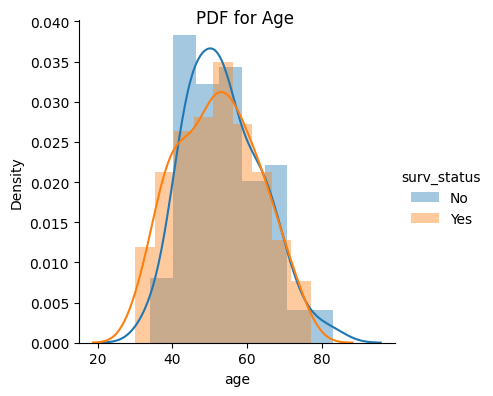

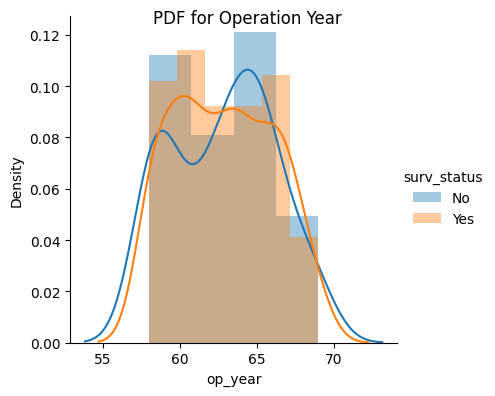

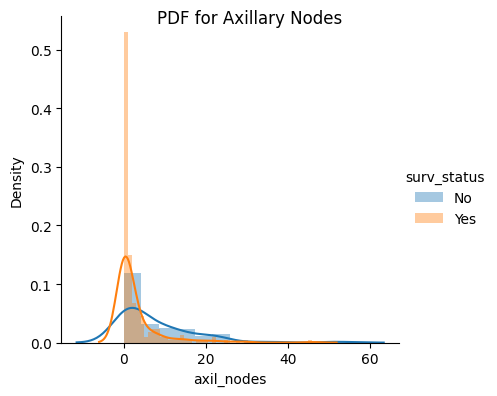

In [11]:
# PDFs

# For Age feature
sns.FacetGrid(haber, hue="surv_status", size=4) \
   .map(sns.distplot, "age") \
   .add_legend(); \
    plt.ylabel('Density') ; 
plt.suptitle('PDF for Age');

# For Operation Year feature
sns.FacetGrid(haber, hue="surv_status", size=4) \
   .map(sns.distplot, "op_year") \
   .add_legend(); \
    plt.ylabel('Density') ;
plt.suptitle('PDF for Operation Year');

# For Axillary nodes feature
sns.FacetGrid(haber, hue="surv_status", size=4) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend(); 
    
plt.ylabel('Density') ;
plt.suptitle('PDF for Axillary Nodes');

plt.show();

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


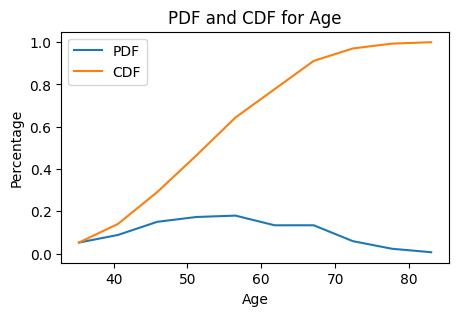

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


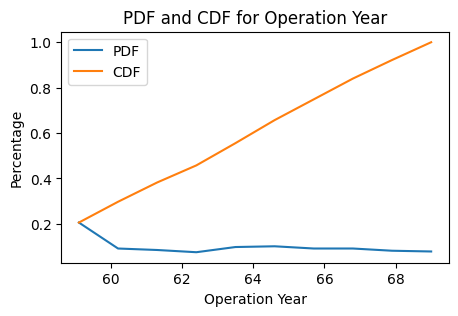

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


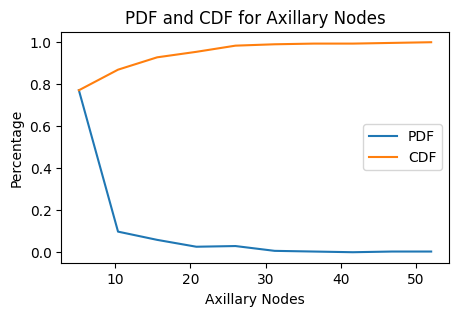

In [12]:
# CDFs

plt.figure(figsize=(5,3))

# For Age feature
counts, bin_edges = np.histogram(haber['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('PDF and CDF for Age')
plt.legend(loc='best')
plt.show()

# For Operation Year feature
plt.figure(figsize=(5,3))
counts, bin_edges = np.histogram(haber['op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.xlabel('Operation Year')
plt.ylabel('Percentage')
plt.title('PDF and CDF for Operation Year')
plt.legend(loc='best')
plt.show()

# For Operation Year feature
plt.figure(figsize=(5,3))
counts, bin_edges = np.histogram(haber['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.xlabel('Axillary Nodes')
plt.ylabel('Percentage')
plt.title('PDF and CDF for Axillary Nodes')
plt.legend(loc='best')
plt.show()

### Observations:

- From the CDF we can say that 80% of the people are below the age of 65. 
- 80% of the people went for an operation between the year 1959 and 1968.
- 80% of the people have the axillary nodes of ~4.

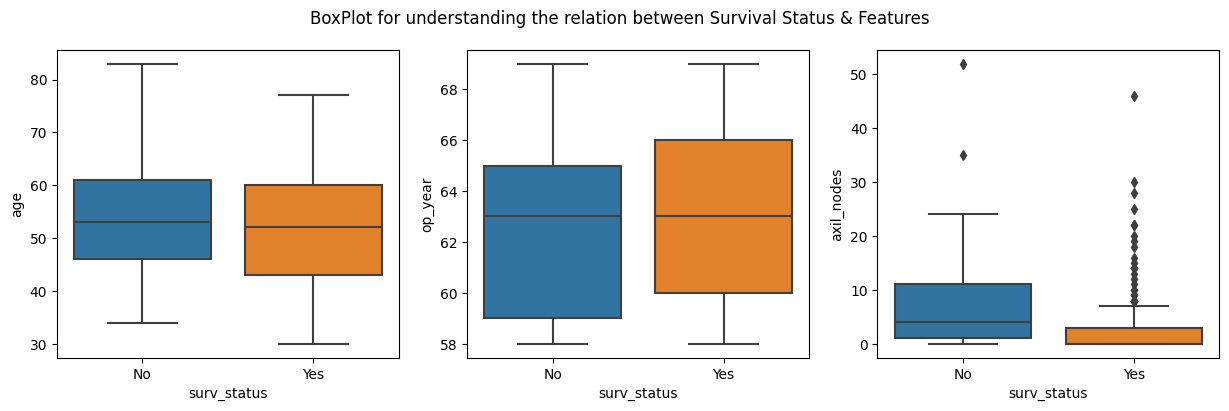

In [13]:
# Box Plots

plt.figure(figsize=[15,4])
plt.suptitle('BoxPlot for understanding the relation between Survival Status & Features')
plt.subplot(1,3,1)
sns.boxplot(x='surv_status',y='age', data=haber)
plt.subplot(1,3,2)
sns.boxplot(x='surv_status',y='op_year', data=haber)
plt.subplot(1,3,3)
sns.boxplot(x='surv_status',y='axil_nodes', data=haber)
plt.show()

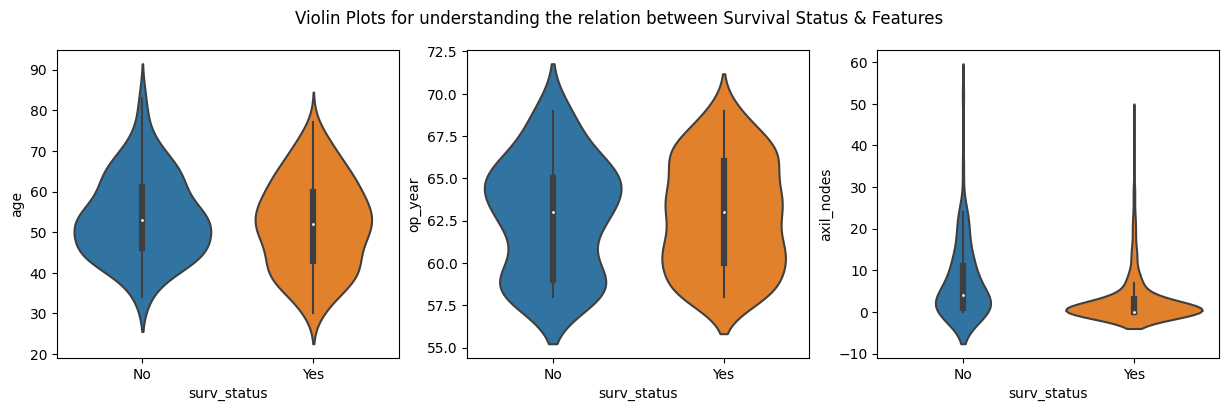

In [14]:
# Violin Plots

plt.figure(figsize=[15,4])
plt.suptitle('Violin Plots for understanding the relation between Survival Status & Features')
plt.subplot(1,3,1)
sns.violinplot(x='surv_status',y='age', data=haber)
plt.subplot(1,3,2)
sns.violinplot(x='surv_status',y='op_year', data=haber)
plt.subplot(1,3,3)
sns.violinplot(x='surv_status',y='axil_nodes', data=haber)
plt.show()

### Observations:

- People operated around 1959 or 1964 have less chances of survival while operations conducted around 1961 have good chances of survival.
- The number of axil nodes are spiked around 3 for the survivors.
- If we were to rank the importance of the features for our classification model, I would rank axil nodes on the top, then Year of Operation and at last the age

## Bivariate Analysis

<Figure size 2000x1000 with 0 Axes>

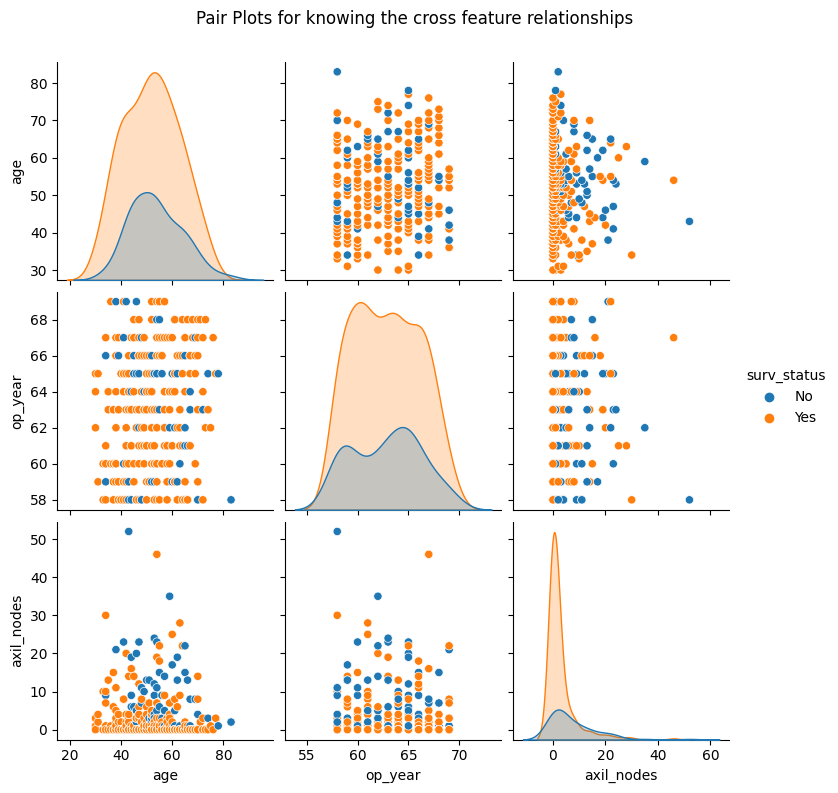

In [15]:
# Pair Plots

plt.figure(figsize=[20,10])
p = sns.pairplot(haber,hue='surv_status')
p.fig.suptitle('Pair Plots for knowing the cross feature relationships',y=1.05)
plt.show()

<Figure size 2000x1000 with 0 Axes>

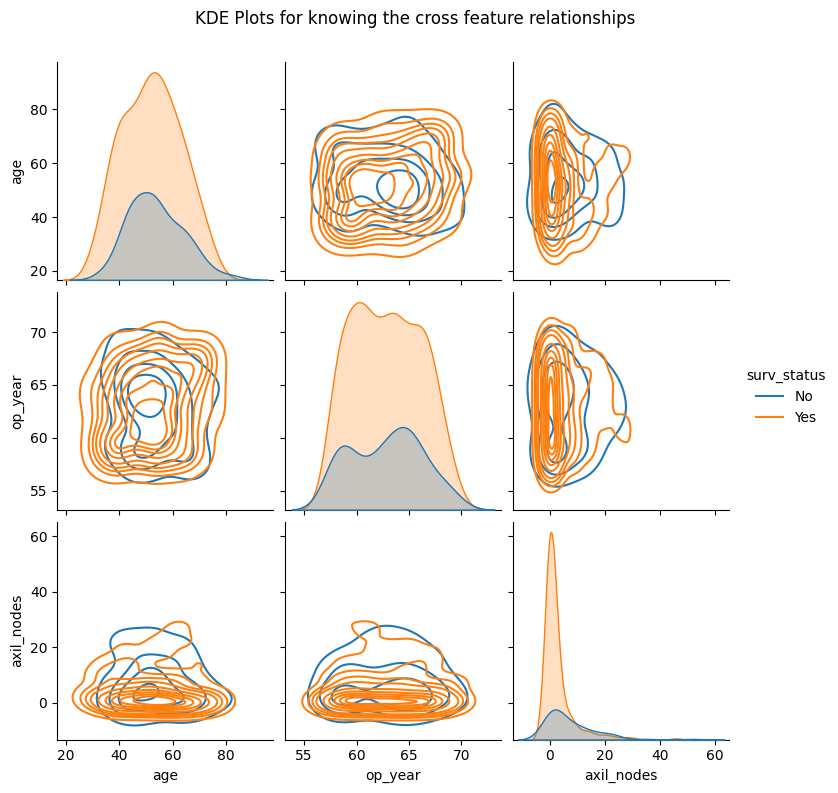

In [16]:
# Kernel Density Estimate (KDE) Pair Plots

plt.figure(figsize=[20,10])
p2 = sns.pairplot(haber,hue='surv_status',kind='kde')
p2.fig.suptitle('KDE Plots for knowing the cross feature relationships',y=1.05)
plt.show()

### Observations

- In pairplot, 3C2 combinations will be forming i.e. 3. As we know in pair plot, above the diagonal and the below it are mirror images so I will be looking above the diagonal for the analysis.
- When looking at the 2D scatter plots, linear seperability is not giving a clear distinction and there are lots of overlaps. For example, The scatter plot between axil_nodes and age seems to be a better choice amongst all but still there will be misclassifications.
- Axil Nodes seems to still #1 choice but we have to come up with more features to get better results. 

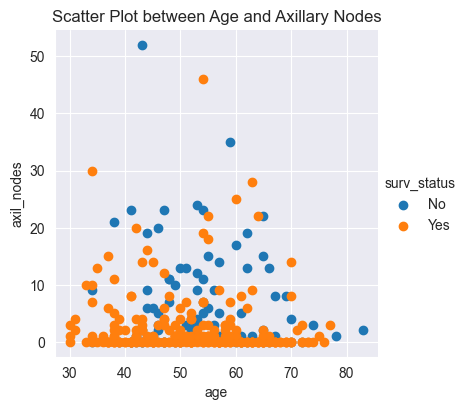

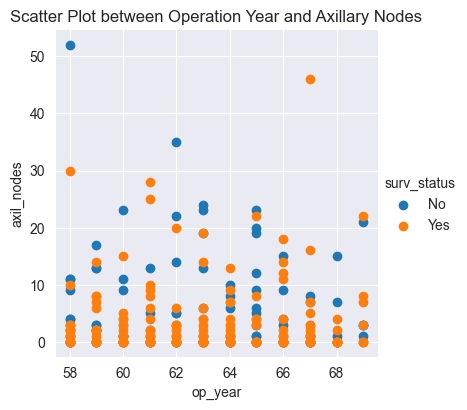

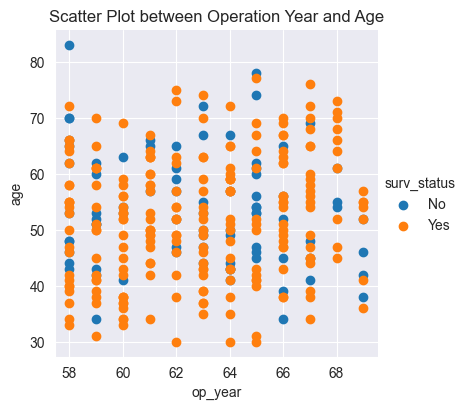

In [17]:
# Let's look features in a single view 

sns.set_style("darkgrid");
sns.FacetGrid(haber, hue="surv_status", size=4) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend(); 
plt.title('Scatter Plot between Age and Axillary Nodes')
plt.show()

sns.set_style("darkgrid");
sns.FacetGrid(haber, hue="surv_status", size=4) \
   .map(plt.scatter, "op_year", "axil_nodes") \
   .add_legend();
plt.title('Scatter Plot between Operation Year and Axillary Nodes')
plt.show();

sns.set_style("darkgrid");
sns.FacetGrid(haber, hue="surv_status", size=4) \
   .map(plt.scatter, "op_year", "age") \
   .add_legend();
plt.title('Scatter Plot between Operation Year and Age')
plt.show();

## Multivariate Analysis

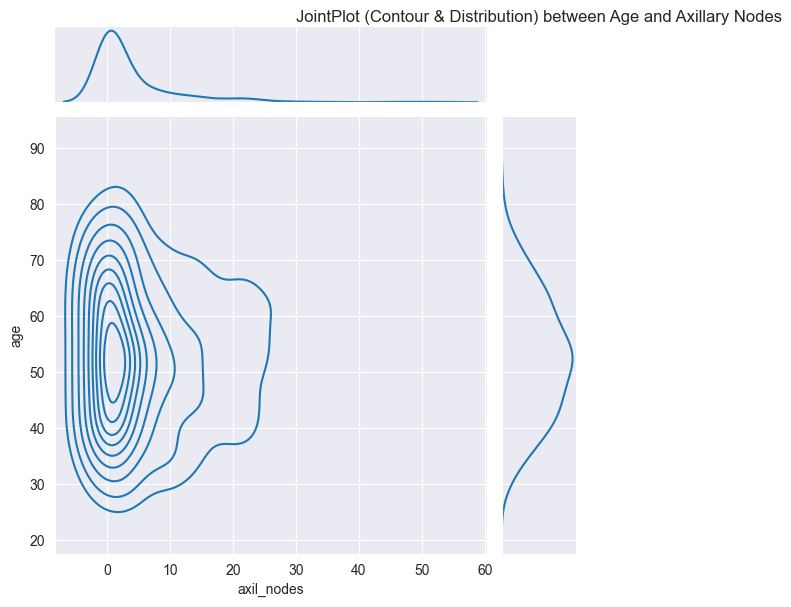

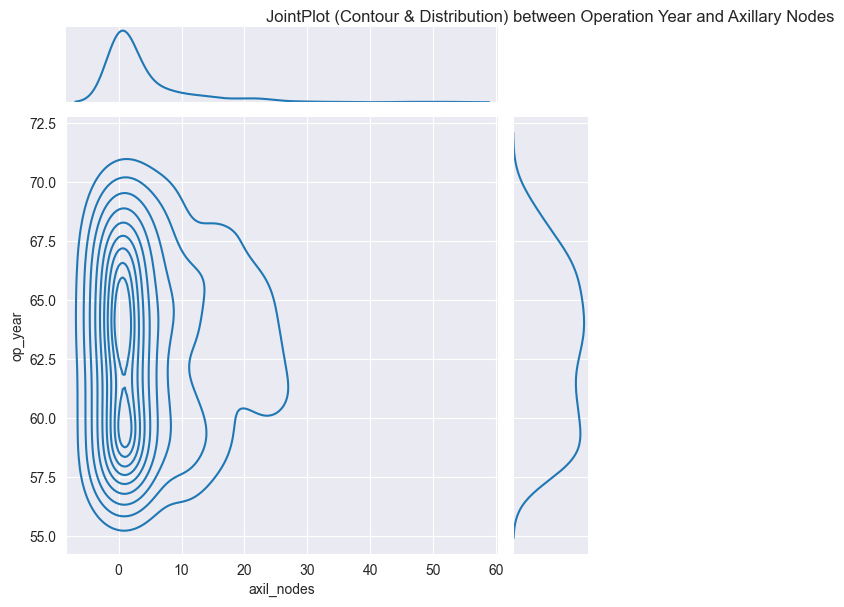

In [18]:
# Contour Plots

sns.jointplot(x="axil_nodes", y="age", data=haber, kind="kde");
plt.title('JointPlot (Contour & Distribution) between Age and Axillary Nodes',y=1.2)
plt.show()

sns.jointplot(x="axil_nodes", y="op_year", data=haber, kind="kde");
plt.title('JointPlot (Contour & Distribution) between Operation Year and Axillary Nodes',y=1.2)
plt.show()

### Observations:

- In the age bracket of 45 and 65, people who are having more than 5 axillary nodes are having lesser chances of survival (Visible in the scatter plot between the two)
- Supporting the first point, people who got operated in the year 1965 and are having higher axillary nodes have even lesser chances of survival.
- In general, 1960-61 operated people have higher chances of survival while the people operated in 1965 have much lesser chances of survival.